<a href="https://colab.research.google.com/github/acewolfag/modelFaceNet/blob/main/original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
baocaoai_mtcnndataset_path = kagglehub.dataset_download('duongphan123/face-recognition-dataset')

print('Data source import complete.')

100%|██████████| 48.3M/48.3M [00:01<00:00, 43.2MB/s]

Extracting files...


Data source import complete.


In [2]:
!cp -r /root/.cache/kagglehub/datasets/duongphan123/face-recognition-dataset/versions/2 /content/new1

In [6]:
import os
import shutil
from sklearn.model_selection import train_test_split
source_folder = '/content/new1'
train_folder = "/content/train"
val_folder = "/content/val"

# Tạo thư mục train và val nếu chưa có
os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# Lặp qua tất cả các folder (tương ứng với từng class)
for person in os.listdir(source_folder):
    person_path = os.path.join(source_folder, person)

    # Kiểm tra nếu đó là một folder
    if os.path.isdir(person_path):
        # Lấy danh sách các file trong folder person
        images = os.listdir(person_path)

        # Chia dữ liệu theo tỷ lệ train và val
        train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

        # Tạo thư mục cho class trong train và val
        train_class_folder = os.path.join(train_folder, person)
        val_class_folder = os.path.join(val_folder, person)
        os.makedirs(train_class_folder, exist_ok=True)
        os.makedirs(val_class_folder, exist_ok=True)

        # Di chuyển file vào thư mục tương ứng
        for image in train_images:
            shutil.copy(os.path.join(person_path, image), os.path.join(train_class_folder, image))

        for image in val_images:
            shutil.copy(os.path.join(person_path, image), os.path.join(val_class_folder, image))

        print(f"Đã hoàn thành phân chia cho class {person}")

print("Đã hoàn tất phân chia dữ liệu!")


Đã hoàn thành phân chia cho class Kashyap
Đã hoàn thành phân chia cho class Marmik
Đã hoàn thành phân chia cho class Courtney Cox
Đã hoàn thành phân chia cho class Jessica Alba
Đã hoàn thành phân chia cho class Hugh Jackman
Đã hoàn thành phân chia cho class Elizabeth Olsen
Đã hoàn thành phân chia cho class Alexandra Daddario
Đã hoàn thành phân chia cho class Ellen Degeneres
Đã hoàn thành phân chia cho class Brad Pitt
Đã hoàn thành phân chia cho class Robert Downey Jr
Đã hoàn thành phân chia cho class Vijay Deverakonda
Đã hoàn thành phân chia cho class Zac Efron
Đã hoàn thành phân chia cho class Amitabh Bachchan
Đã hoàn thành phân chia cho class Dwayne Johnson
Đã hoàn thành phân chia cho class Natalie Portman
Đã hoàn thành phân chia cho class Thai Duong
Đã hoàn thành phân chia cho class Akshay Kumar
Đã hoàn thành phân chia cho class Tom Cruise
Đã hoàn thành phân chia cho class Charlize Theron
Đã hoàn thành phân chia cho class Anushka Sharma
Đã hoàn thành phân chia cho class Andy Samberg

In [5]:
!pip install facenet-pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.

In [1]:
import os
import argparse
import joblib
import numpy as np
from PIL import Image
from torchvision import transforms, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score
import joblib
import random
import matplotlib.pyplot as plt
from facenet_pytorch import MTCNN, InceptionResnetV1, extract_face
import torch
from sklearn.decomposition import PCA
from sklearn import svm

In [2]:
def whitens(img):
    """
    Chuẩn hóa ảnh bằng cách trừ mean và chia cho std được điều chỉnh.
    """
    mean = img.mean()
    std = img.std()
    std_adj = std.clamp(min=1.0 / (float(img.numel()) ** 0.5))  # Đảm bảo std không bằng 0
    y = (img - mean) / std_adj
    return y

def extract_features(facenet, img):
    """
    Trích xuất đặc trưng từ ảnh đã được căn chỉnh (crop trước).
    """
    img = img.to(device)  # Chuyển tensor sang thiết bị
    img = whitens(img.unsqueeze(0))  # Chuẩn hóa tensor ảnh
    embedding = facenet(img).detach().cpu().numpy()  # Trích xuất đặc trưng và chuyển về CPU

    return embedding.flatten()

def dataset_to_embeddings(dataset, facenet):
    """
    Chuyển đổi tập dữ liệu thành embeddings và nhãn tương ứng.
    """
    transform = transforms.Compose([
        transforms.Resize((160, 160)),  # Resize ảnh về kích thước cố định cho FaceNet
        transforms.ToTensor()
    ])

    embeddings = []
    labels = []
    for img_path, label in dataset.samples:
        print(f"Processing: {img_path}")
        img_tensor = transform(Image.open(img_path).convert('RGB')).to(device)  # Chuyển ảnh về tensor trên thiết bị

        embedding = extract_features(facenet, img_tensor)

        if embedding is None:
            print(f"Could not extract embedding for {img_path}")
            continue

        embeddings.append(embedding)
        labels.append(label)

    return np.stack(embeddings), labels

def train(embeddings, labels):
    """
    Huấn luyện mô hình SVM với embeddings và nhãn tương ứng.
    """
    clf = svm.SVC(probability=True)  # SVM với khả năng dự đoán xác suất
    clf.fit(embeddings, labels)
    return clf

In [11]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

mtcnn = MTCNN(keep_all=True, thresholds=[0.6, 0.7, 0.9], device=device)
facenet = InceptionResnetV1(pretrained='vggface2').eval()

facenet = facenet.to(device)

In [12]:
data_path = source_folder
train_path = "/content/train"
val_path = "/content/val"

dataset_train = datasets.ImageFolder(root=train_path)
dataset_val = datasets.ImageFolder(root=val_path)

In [15]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# Chuyển đổi ảnh thành embeddings
model = facenet
X_train, y_train = dataset_to_embeddings(dataset_train, model)
X_test, y_test = dataset_to_embeddings(dataset_val, model)

# Lấy danh sách ánh xạ giữa nhãn và chỉ mục lớp
X_train_class_idx = dataset_train.class_to_idx
X_test_class_idx = dataset_val.class_to_idx

# Kết quả cuối
embeddings, labels, class_to_idx = X_train, y_train, X_train_class_idx

Processing: /content/train/Akshay Kumar/Akshay Kumar_0_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_10_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_11_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_12_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_13_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_14_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_16_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_17_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_18_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_19_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_1_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_20_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_21_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_23_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_24_face_1.j

In [16]:
clf = train(embeddings, labels)

# Save the trained model
joblib.dump(clf, 'face_recognition_model.pkl')

['face_recognition_model.pkl']

In [17]:
idx_to_class = {v: k for k, v in class_to_idx.items()}
print(idx_to_class)

target_names = list(map(lambda i: i[1], sorted(idx_to_class.items(), key=lambda i: i[0])))
print(metrics.classification_report(labels, clf.predict(embeddings), target_names=target_names))

# Predict labels for validation set and calculate accuracy
y_val_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_val_pred)
print('Validation Accuracy: {:.2f}%'.format(accuracy*100))

{0: 'Akshay Kumar', 1: 'Alexandra Daddario', 2: 'Alia Bhatt', 3: 'Amitabh Bachchan', 4: 'Andy Samberg', 5: 'Anushka Sharma', 6: 'Billie Eilish', 7: 'Brad Pitt', 8: 'Camila Cabello', 9: 'Charlize Theron', 10: 'Claire Holt', 11: 'Courtney Cox', 12: 'Dwayne Johnson', 13: 'Elizabeth Olsen', 14: 'Ellen Degeneres', 15: 'Henry Cavill', 16: 'Hrithik Roshan', 17: 'Hugh Jackman', 18: 'Jessica Alba', 19: 'Kashyap', 20: 'Khanh Huy', 21: 'Lisa Kudrow', 22: 'Margot Robbie', 23: 'Marmik', 24: 'Natalie Portman', 25: 'Priyanka Chopra', 26: 'Robert Downey Jr', 27: 'Roger Federer', 28: 'Thai Duong', 29: 'Tom Cruise', 30: 'Vijay Deverakonda', 31: 'Virat Kohli', 32: 'Zac Efron'}
                    precision    recall  f1-score   support

      Akshay Kumar       1.00      1.00      1.00        40
Alexandra Daddario       1.00      1.00      1.00        73
        Alia Bhatt       1.00      1.00      1.00        63
  Amitabh Bachchan       1.00      1.00      1.00        59
      Andy Samberg       1.00   

In [18]:
import os
import random
import matplotlib.pyplot as plt

def generate_random_color():
    """Hàm tạo màu ngẫu nhiên dưới dạng ký tự của matplotlib"""
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

def assign_colors(data_folder):
    """
    Gán màu ngẫu nhiên cho từng class trong thư mục dữ liệu.
    Trả về dictionary với class làm key và màu sắc làm giá trị.
    """
    # Lấy danh sách tất cả các class từ thư mục
    class_labels = [d for d in os.listdir(data_folder) if os.path.isdir(os.path.join(data_folder, d))]

    # Tạo dictionary gán màu ngẫu nhiên cho mỗi class
    colors = {}
    for label in class_labels:
        colors[label] = generate_random_color()

    return colors

color_mapping = assign_colors(source_folder)

# Lưu label và color vào một mảng
label_color_array = [(label, color) for label, color in color_mapping.items()]

# In ra mảng
print("Label and Color Array:")
for item in label_color_array:
    print(item)

# Nếu cần lưu vào file, bạn có thể thêm:
with open("label_colors.txt", "w") as f:
    for label, color in label_color_array:
        f.write(f"{label}: {color}\n")

Label and Color Array:
('Kashyap', '#c640a8')
('Marmik', '#178c76')
('Courtney Cox', '#09e8b9')
('Jessica Alba', '#806661')
('Hugh Jackman', '#b21570')
('Elizabeth Olsen', '#af9426')
('Alexandra Daddario', '#8ca230')
('Ellen Degeneres', '#a8ad32')
('Brad Pitt', '#bf3cd2')
('Robert Downey Jr', '#c541c5')
('Vijay Deverakonda', '#a0775e')
('Zac Efron', '#638550')
('Amitabh Bachchan', '#4cc009')
('Dwayne Johnson', '#d0396a')
('Natalie Portman', '#5ff507')
('Thai Duong', '#6b06b4')
('Akshay Kumar', '#54f593')
('Tom Cruise', '#c83a92')
('Charlize Theron', '#897cec')
('Anushka Sharma', '#88c6a5')
('Andy Samberg', '#ed83bd')
('Virat Kohli', '#91d109')
('Roger Federer', '#edaecc')
('Camila Cabello', '#694fa5')
('Henry Cavill', '#ec2a64')
('Hrithik Roshan', '#83095b')
('Billie Eilish', '#670c50')
('Claire Holt', '#a9e2da')
('Alia Bhatt', '#b541c2')
('Margot Robbie', '#66aa9e')
('Priyanka Chopra', '#ba172b')
('Lisa Kudrow', '#35dc1d')
('Khanh Huy', '#ac66ee')


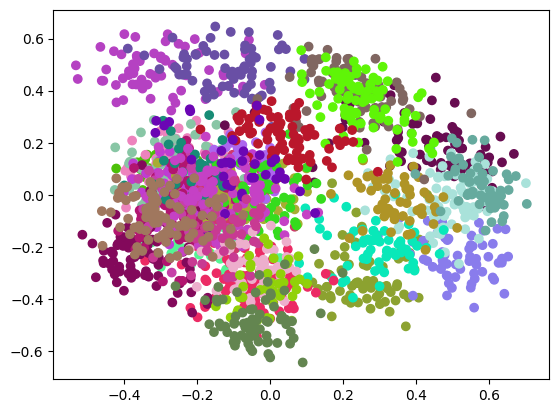

In [19]:
# Use PCA to reduce the dimensionality of the embeddings
pca = PCA(n_components=5)
embeddings_2d = pca.fit_transform(X_train)

# Map numeric labels to actual names
mapped_labels = [idx_to_class[label] for label in y_train]

# Define a function to assign colors to labels
# MODIFIED: Use color_mapping dictionary instead of tuple
def assign_colors(label):
    return color_mapping.get(label, 'black')  # Default to black if label not found

# Create color array for all points
colors = list(map(assign_colors, mapped_labels))

# Plot the 2D embeddings
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)
plt.show()

[[0.0350359  0.02186485 0.02553057 0.00974097 0.02047167 0.02530082
  0.12504816 0.01076312 0.07538763 0.02134927 0.13056047 0.01788635
  0.02015204 0.02204042 0.01103414 0.02524635 0.0303212  0.02546136
  0.03391418 0.03196585 0.02140972 0.02152582 0.02431817 0.01880002
  0.03432363 0.02302847 0.0255834  0.01712119 0.03206572 0.01066692
  0.02559819 0.01240822 0.01407519]]


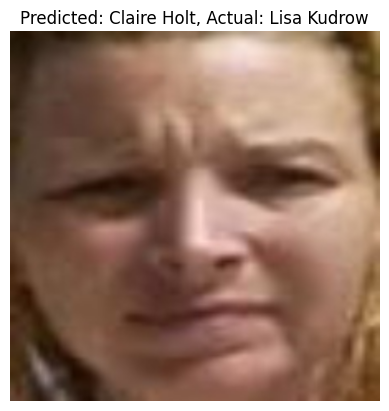

[[0.03228918 0.02511973 0.01427727 0.01929229 0.03974271 0.015728
  0.14740185 0.01953577 0.0348907  0.02891805 0.06387632 0.02466535
  0.01575035 0.02279588 0.01527759 0.02665691 0.03465384 0.02599693
  0.03535672 0.01703641 0.02864149 0.02571713 0.0172814  0.01301986
  0.06267565 0.01602754 0.04743756 0.01667682 0.05285328 0.01067371
  0.0149018  0.01196155 0.02287034]]


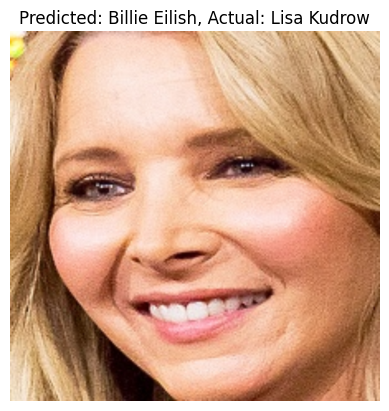

[[0.04230936 0.02444057 0.01611282 0.0118333  0.030576   0.02380647
  0.13587758 0.01183533 0.03570415 0.03365246 0.07068583 0.02450446
  0.027624   0.01976804 0.01377803 0.02338727 0.0320481  0.02858913
  0.02501986 0.02284942 0.03743982 0.02589905 0.01495033 0.01475654
  0.05680822 0.01942826 0.03647672 0.02078843 0.06253523 0.01167598
  0.01459108 0.01250012 0.01774807]]


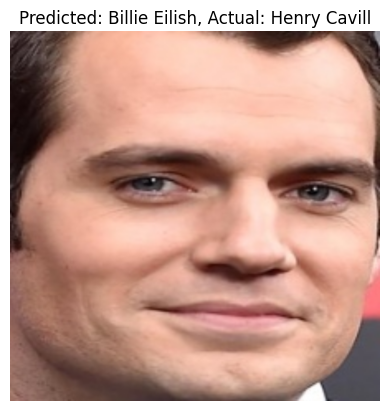

[[0.03935254 0.0298348  0.01330934 0.01615141 0.02863835 0.01771444
  0.11993101 0.01602094 0.04127774 0.03225467 0.05093615 0.0254113
  0.01973366 0.01800505 0.01294908 0.03126696 0.05487171 0.03148987
  0.03009002 0.01871908 0.03846267 0.02337992 0.0126979  0.01558136
  0.04574063 0.01951669 0.04168637 0.01787601 0.07307316 0.01003686
  0.02035183 0.01138164 0.02225681]]


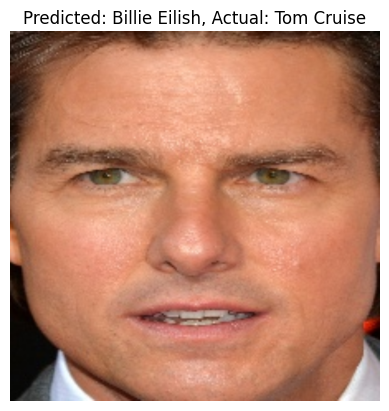

[[0.04516156 0.02687479 0.01415373 0.01820335 0.02864961 0.01757436
  0.14432321 0.01337934 0.04212646 0.02380946 0.04395652 0.02656915
  0.0177485  0.01915051 0.01148879 0.02817587 0.05758667 0.03369076
  0.02919559 0.02007555 0.04004951 0.02372884 0.01118163 0.01328997
  0.03985404 0.01707985 0.03440871 0.0224989  0.06931988 0.01043728
  0.02043505 0.01428435 0.0215382 ]]


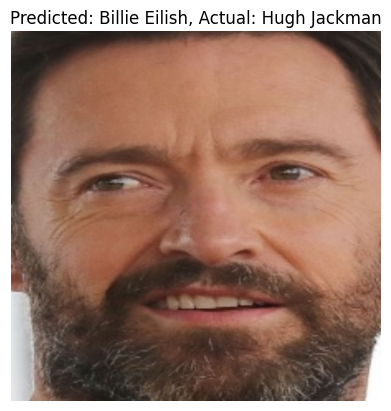

In [27]:
import random
from PIL import Image
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

transform_img = transforms.Compose([transforms.Resize(1024)])
transform = transforms.Compose([
    transforms.Resize(1024),
    transforms.ToTensor()
])

dataset_val = datasets.ImageFolder(root="/content/train")
val_samples = dataset_val.samples

random_samples = random.choices(val_samples, k=5)

def extract_features(facenet, img):
    # img: tensor đã transform
    img = img.to(device)
    img = whitens(img.unsqueeze(0))  # Giả sử whitens đã định nghĩa trước, chuẩn hóa ảnh
    embedding = facenet(img).detach().cpu().numpy()
    # Giả sử chỉ có 1 khuôn mặt, embedding shape: (1, D)
    return embedding.flatten()  # Trả về 1D vector

for img_path, true_label in random_samples:
    img_ = transform_img(Image.open(img_path).convert('RGB'))
    img = transform(Image.open(img_path).convert('RGB'))

    # Trích xuất đặc trưng
    embedding = extract_features(model, img)

    # Dự đoán nhãn
    predicted_label = clf.predict(embedding.reshape(1, -1))
    print(clf.predict_proba(embedding.reshape(1, -1)))

    predicted_class = idx_to_class[predicted_label[0]]
    true_class = idx_to_class[true_label]

    plt.imshow(img_)
    plt.title(f'Predicted: {predicted_class}, Actual: {true_class}')
    plt.axis('off')
    plt.show()

## Intruder Recognition

The code performs face recognition on a single image specified by img_path and displays the predicted label along with the image:

[[0.04988049 0.02390463 0.01928817 0.01269322 0.03036882 0.027207
  0.08661124 0.01436925 0.06443582 0.0276059  0.07941871 0.0223447
  0.03386429 0.02336344 0.01194733 0.03202883 0.03177262 0.02965175
  0.03089267 0.03244907 0.01870845 0.02270302 0.02064652 0.01980486
  0.04319569 0.02299362 0.04687941 0.01875551 0.03826956 0.01356972
  0.02365626 0.0114867  0.01523273]]


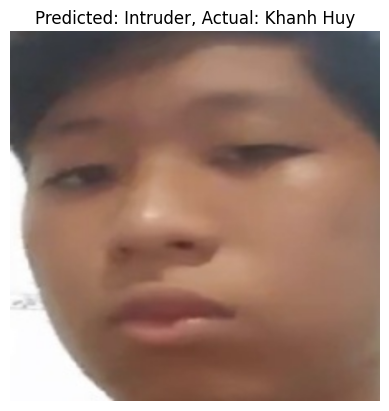

In [25]:
img_path = '/content/new1/Khanh Huy/frame_00550_face_1.jpg'

img_ = transform_img(Image.open(img_path).convert('RGB'))
img = transform(Image.open(img_path).convert('RGB'))

embedding = extract_features(model, img)

predicted_label = clf.predict(embedding.reshape(1, -1))
predicted_class = idx_to_class[predicted_label[0]]

print(clf.predict_proba(embedding.reshape(1, -1)))

thres = 0.6
if np.max(clf.predict_proba(embedding.reshape(1, -1))) < thres:
    predicted_class = 'Intruder'

# Nếu bạn không có true_label và muốn hiển thị cứng "Khanh Huy"
plt.imshow(img_)
plt.title(f'Predicted: {predicted_class}, Actual: {"Khanh Huy"}')
plt.axis('off')
plt.show()